In [8]:
import os
import MDAnalysis as md
import MDAnalysis.analysis.rms
import h5py
import numpy as np
import scipy
import matplotlib.pyplot as plt
from MDAnalysis.analysis.base import (AnalysisBase, AnalysisFromFunction, analysis_class)
import matplotlib.ticker as ticker

In [ ]:
# Write all the paths to the kinetic files (xvg-files). Note here that we will use three files due to three different photon energies
kin_file_1 = '/home/simon/results/ubiWT_1M_300ev/sim1/kin.xvg'
kin_file_2 = '/home/simon/results/ubiWT_1M_600ev/sim1/kin.xvg'
kin_file_3 = '/home/simon/results/ubiWT_1M_2000ev/sim1/kin.xvg'

In [ ]:
# This is where all the values will be put (do not change)
x = []
kin1 = []
kin2 = []
kin3 = []

In [ ]:
# Open the first kinetic file
with open(kin_file_1) as data:

    # For all lines ...
    for line in data:

        # if the line starts with # or @, then it does not contain information about the energy, so we skip
        if line.startswith(('#', '@')):
            continue

        # Otherwise we will split the values of the line (first one is time, second one is the energy)
        values = line.split()

        # We append the time as x (note here that we want time in fs, so we multiply by 1000)
        x.append(float(values[0]) * 1000)

        # and append the kinetic energy
        kin1.append(float(values[1]))

In [ ]:
# Similar to kinetic1 (see above)
with open(kin_file_2) as data:
    for line in data:
        if line.startswith(('#', '@')):
            continue
        values = line.split()
        kin2.append(float(values[1]))

In [13]:
with open(kin_file_3) as data:
    for line in data:
        if line.startswith(('#', '@')):
            continue
        values = line.split()
        kin3.append(float(values[1]))

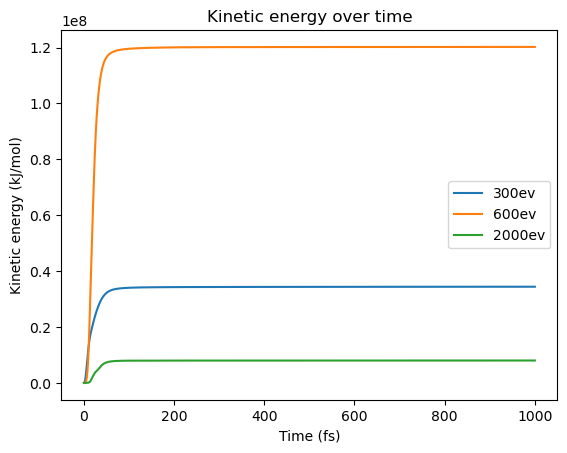

In [ ]:
# Here we plot the kinetic energy as a function of time
fig, ax = plt.subplots()
ax.plot(x, kin1)
ax.plot(x, kin2)
ax.plot(x, kin3)
plt.title('Kinetic energy over time')
plt.xlabel('Time (fs)')
plt.ylabel('Kinetic energy (kJ/mol)')
ax.legend(['300ev', '600ev', '2000ev'])